**Credit card fraud detection using imbalanced data**

**Introduction:**

In this notebook we will learn how to work with imbalanced dataset to make it suitable for feeding into machine learning algorithms. By imbalanced dataset we mean that we have a cetain type of case in our dataset that dominates the other cases by a huge amount. This kind of dataset should not be fed into our machine learning algorithm as it will return a model which is heavily biased toward the dominant case. There are some techniques to handle these kind of cases and we will be using randomm undersampling technique, in random undersampling we will be downsizing our dataset so that we have equal number of rows for each of the case.

**Note: Undersampling of data should only be done when size of data is very large and each case have respectable number of rows in it**




In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from  imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
#Importing and getting sense of data
df=pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The data is taken from kaggel(*https://www.kaggle.com/mlg-ulb/creditcardfraud*)

Features *V1* to *V28* may be result of a PCA Dimensionality reduction to protect user identities and sensitive features.
As we can see above our data has a total of 31 features.
Before we begin we need to explore our data and see if any data is missing or would we need to scale any feature.

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values in our dataset

In [5]:
print(df["Class"].value_counts()[1]/len(df)*100,"% fraud transactions")
print(df["Class"].value_counts()[0]/len(df)*100,"% non-fraud transactions")

0.1727485630620034 % fraud transactions
99.82725143693798 % non-fraud transactions


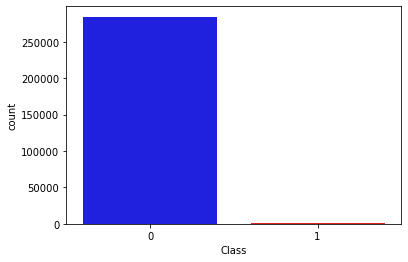

In [6]:
sns.countplot('Class',data=df,palette=['blue','red'])

From above graph we can see our data is heavily **imbalanced** with **99.8%** of cases being **non-fraud**

We will use random Undersampling technique to undersample/Downsize our dataset, for this we will be using **imblearn** library later in the notebook

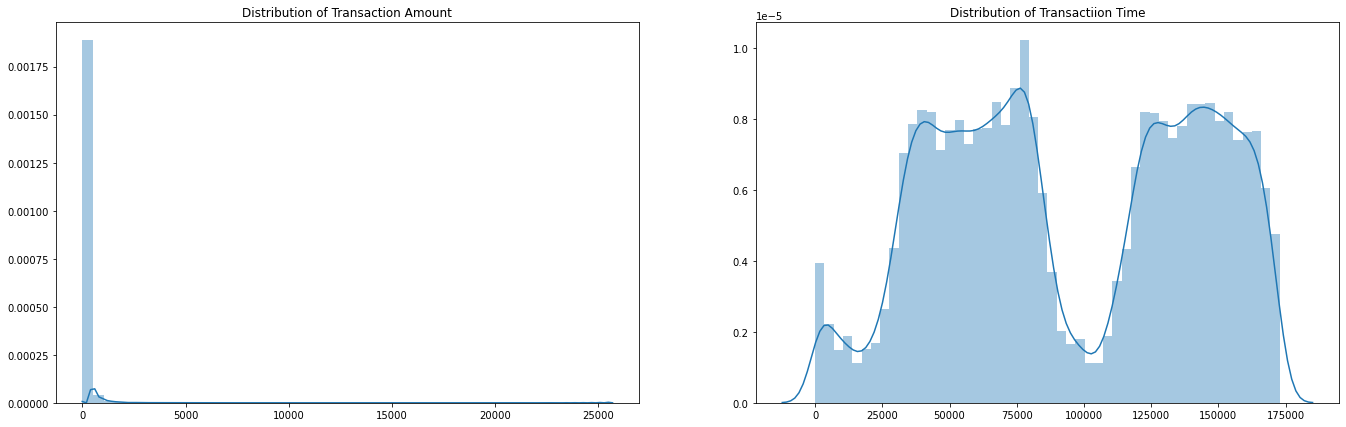

In [7]:
fig,ax = plt.subplots(1,2,figsize=(23,7))
amt=df['Amount'].values
time=df['Time'].values
sns.distplot(amt,ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount', fontsize=12)
sns.distplot(time,ax=ax[1])
ax[1].set_title('Distribution of Transactiion Time', fontsize=12)
plt.show()

From the charts above we can get a few insights:

1). Most of the transactions are of small amount

2). Second Graph shows peak times when most transactions are taking place

In [8]:
#All the other features are already scaled, we need to scale time and amount
std_sc=StandardScaler()
df['sc_amt']=std_sc.fit_transform(df['Amount'].values.reshape(-1,1))
df['sc_time']=std_sc.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'],inplace=True,axis=1)

Now we will use **imblearn library** to undersample our data so that we have **equal cases of fraud and non=fraud transactions**

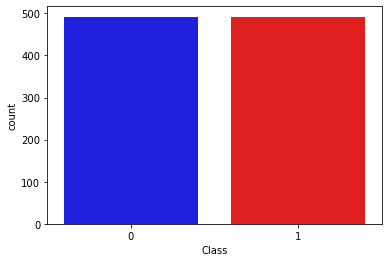

In [10]:
X=df.drop(['Class'],axis=1)
y=df['Class']

random_us=RandomUnderSampler(sampling_strategy='majority',)
Xu ,yu = random_us.fit_resample(X,y)

us_df=pd.concat([Xu,yu],axis=1)
us_df=us_df.sample(frac=1,random_state=66)


sns.countplot(yu,palette=['b','r'])

In [11]:
print('number of fraud cases in undersampled data=',us_df['Class'].value_counts()[1])
print('number of non-fraud cases in undersampled data=',us_df['Class'].value_counts()[0])

number of fraud cases in undersampled data= 492
number of non-fraud cases in undersampled data= 492


We now have equal number of fraud and non-fraud cases in our dataset, we can now feed it our Classification algorithms.
But before that we need to identify which features are more relevant for our model, we can find out these features by using
a correlation matrix which can show how features are correlated with each other.

<module 'matplotlib.pyplot' from 'C:\\Users\\khima\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

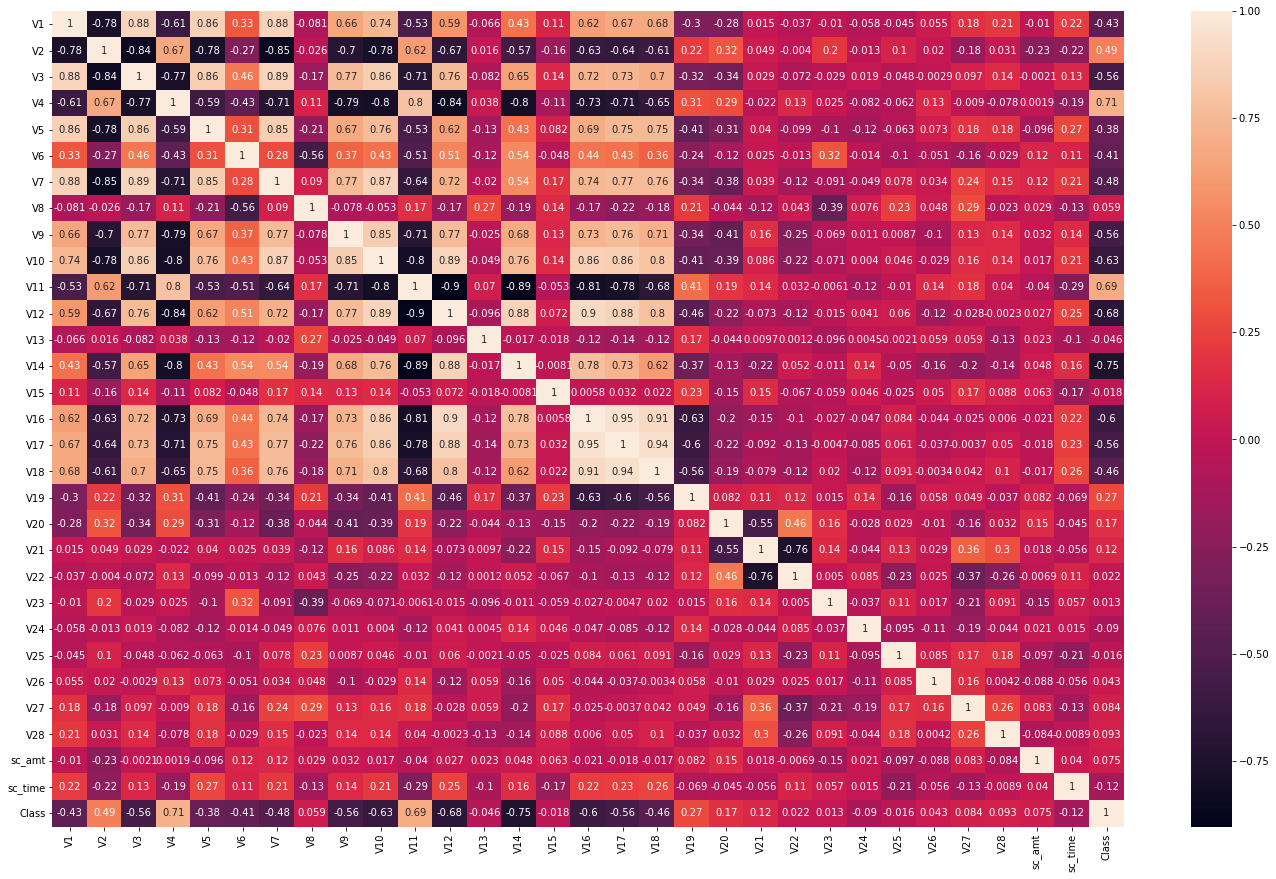

In [12]:
corr=us_df.corr()
f,a = plt.subplots(1,figsize=(24,15))
sns.heatmap(corr,annot=True)
plt

In [13]:
#select features with using high correlation with Class feature
fdf=us_df[['V4','V8','V11','V12','V13','V14','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27',
          'V28','sc_amt','sc_time','Class']]
X_fdf=fdf.drop(['Class'],axis=1)
y_fdf=fdf['Class']

In [14]:
#preparing Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X_fdf,y_fdf,test_size=0.2,random_state=66)


In [15]:
#Training Models

log_reg=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
dec_tree=DecisionTreeClassifier()

log_reg.fit(X_train,y_train)
knn.fit(X_train,y_train)
svc.fit(X_train,y_train)
dec_tree.fit(X_train,y_train)

print('Logistic Regression has an accuracy score=',round(cross_val_score(log_reg,X_train,y_train,cv=5).mean(),2)*100)
print('K-near neighbor has an accuracy score=',round(cross_val_score(knn,X_train,y_train,cv=5).mean(),2)*100)
print('Support Vector Classifier has an accuracy score=',round(cross_val_score(svc,X_train,y_train,cv=5).mean(),2)*100)
print('Decision Tree Classifier has an accuracy score=',round(cross_val_score(dec_tree,X_train,y_train,cv=5).mean(),2)*100)


Logistic Regression has an accuracy score= 95.0
K-near neighbor has an accuracy score= 94.0
Support Vector Classifier has an accuracy score= 94.0
Decision Tree Classifier has an accuracy score= 92.0


In [16]:
#Creating Confusion matrix for each Classifier
log_cm=confusion_matrix(y_test,log_reg.predict(X_test))
knn_cm=confusion_matrix(y_test,knn.predict(X_test))
SVC_cm=confusion_matrix(y_test,svc.predict(X_test))
Dec_cm=confusion_matrix(y_test,dec_tree.predict(X_test))

<module 'matplotlib.pyplot' from 'C:\\Users\\khima\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

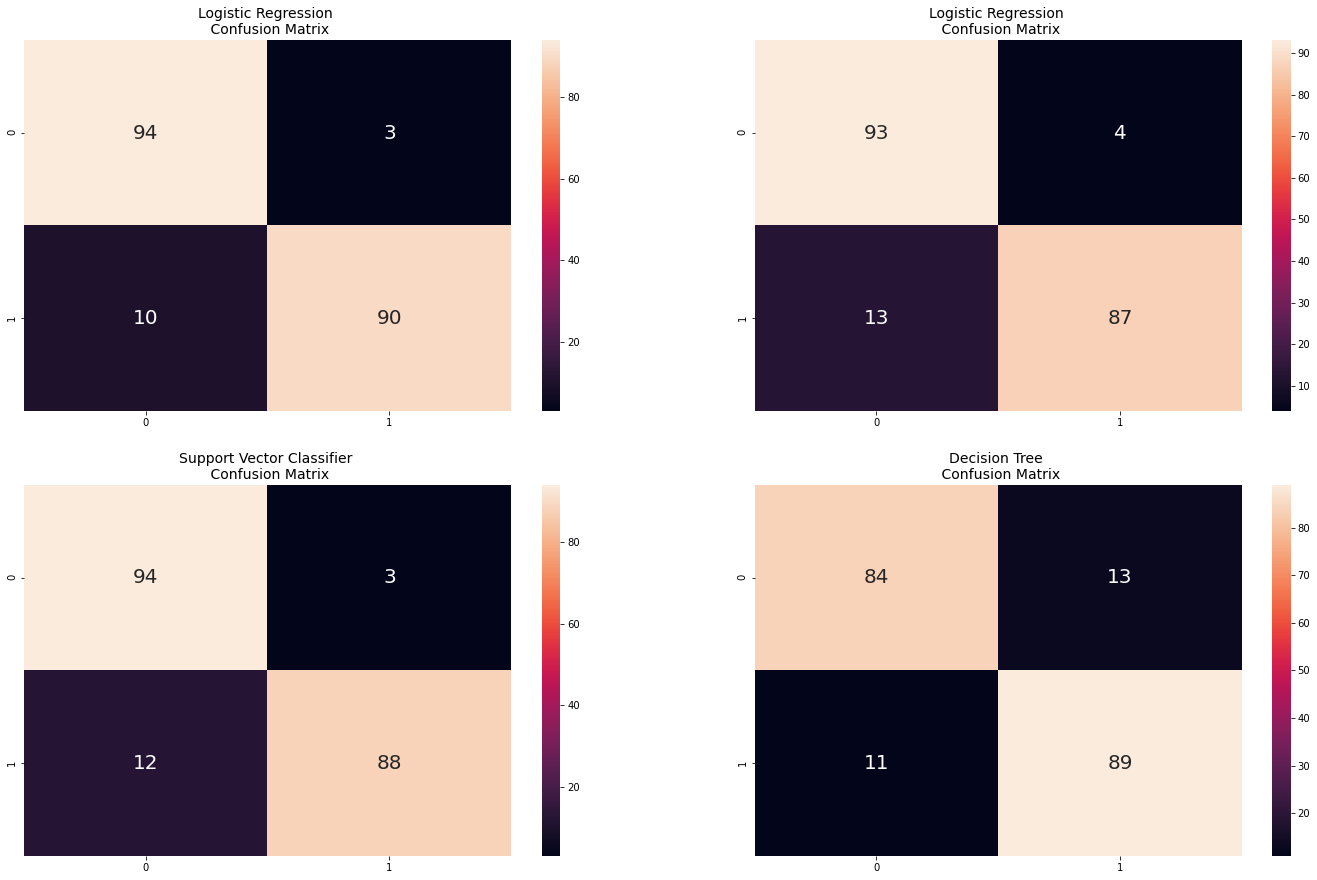

In [17]:
#plotting Confussion matrices as  heatmap
f,ax = plt.subplots(2,2,figsize=(24,15))

sns.heatmap(log_cm, ax=ax[0][0], annot=True,annot_kws={"size": 20})
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

sns.heatmap(knn_cm, ax=ax[0][1], annot=True, annot_kws={"size": 20})
ax[0, 1].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

sns.heatmap(SVC_cm, ax=ax[1][0], annot=True,annot_kws={"size": 20})
ax[1,0].set_title("Support Vector Classifier \n Confusion Matrix", fontsize=14)

sns.heatmap(Dec_cm, ax=ax[1][1], annot=True,annot_kws={"size": 20})
ax[1,1].set_title("Decision Tree \n Confusion Matrix", fontsize=14)
plt

**Summary:**

1).Logistic regression has the highest accuracy score of 95% followed by K-near Neighbours and SupportVector Classifier with accuracy score of 94% and Decision Tree Classifier has the lowest score of 91% in our case.

2).Random undersampling is useful when data size is very large and one case heavily Dominates other cases.

3).Random undersampling is only one of the many techniques we can use for imbalanced data set, other techniques such as Random Oversampling or Neural networks may provide varried results